In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

%matplotlib inline

In [2]:
df_cifar10_x1_b1 = pd.read_csv('/trainingResults/CIFAR10BVAE1_x1.csv', header=0, index_col=False)
df_cifar10_x1_yoto = pd.read_csv('/traininResults/CIFAR10Yoto_x1.csv', header=0, index_col=False)

df_cifar10_x2_b1 = pd.read_csv('/trainingResults/CIFAR10BVAE1_x2.csv', header=0, index_col=False)
df_cifar10_x2_yoto = pd.read_csv('/trainingResults/CIFAR10Yoto_x2.csv', header=0, index_col=False)

df_cifar10_x4_b1 = pd.read_csv('/traininResults/CIFAR10BVAE1_x4.csv', header=0, index_col=False)
df_cifar10_x4_yoto = pd.read_csv('/trainingResults/CIFAR10Yoto_x4.csv', header=0, index_col=False)

In [3]:
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
    # Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    # Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]
    # Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
    # Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

In [4]:
# 1x wide
kl_cifar10_x1_b1 = df_cifar10_x1_b1.iloc[:,0]
recon_cifar10_x1_b1 = df_cifar10_x1_b1.iloc[:,1]
full_cifar10_x1_b1 = df_cifar10_x1_b1.iloc[:,2]

kl_cifar10_x1_yoto = df_cifar10_x1_yoto.iloc[:,0]
recon_cifar10_x1_yoto = df_cifar10_x1_yoto.iloc[:,1]
full_cifar10_x1_yoto = df_cifar10_x1_yoto.iloc[:,2]

# 2x wide
kl_cifar10_x2_b1 = df_cifar10_x2_b1.iloc[:,0]
recon_cifar10_x2_b1 = df_cifar10_x2_b1.iloc[:,1]
full_cifar10_x2_b1 = df_cifar10_x2_b1.iloc[:,2]

kl_cifar10_x2_yoto = df_cifar10_x2_yoto.iloc[:,0]
recon_cifar10_x2_yoto = df_cifar10_x2_yoto.iloc[:,1]
full_cifar10_x2_yoto = df_cifar10_x2_yoto.iloc[:,2]

# 4x wide
kl_cifar10_x4_b1 = df_cifar10_x2_b1.iloc[:,0]
recon_cifar10_x4_b1 = df_cifar10_x2_b1.iloc[:,1]
full_cifar10_x4_b1 = df_cifar10_x2_b1.iloc[:,2]

kl_cifar10_x4_yoto = df_cifar10_x4_yoto.iloc[:,0]
recon_cifar10_x4_yoto = df_cifar10_x4_yoto.iloc[:,1]
full_cifar10_x4_yoto = df_cifar10_x4_yoto.iloc[:,2]


In [5]:
# computing Pareto 

kl_cifar_1x, recon_cifar_1x = pareto_frontier(list(kl_cifar10_x1_b1), list(recon_cifar10_x1_b1))
kl_cifar_2x, recon_cifar_2x = pareto_frontier(list(kl_cifar10_x2_b1), list(recon_cifar10_x2_b1))
kl_cifar_4x, recon_cifar_4x = pareto_frontier(list(kl_cifar10_x4_b1), list(recon_cifar10_x4_b1))

kl_cifar_1x_yoto, recon_cifar_1x_yoto = pareto_frontier(list(kl_cifar10_x1_yoto), list(recon_cifar10_x1_yoto))
kl_cifar_2x_yoto, recon_cifar_2x_yoto = pareto_frontier(list(kl_cifar10_x2_yoto), list(recon_cifar10_x2_yoto))
kl_cifar_4x_yoto, recon_cifar_4x_yoto = pareto_frontier(list(kl_cifar10_x4_yoto), list(recon_cifar10_x4_yoto))


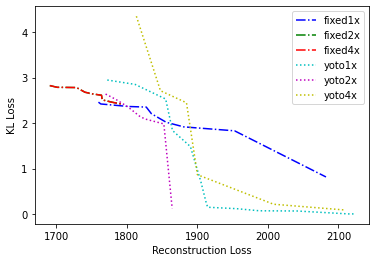

In [7]:
plt.plot(recon_cifar_1x, kl_cifar_1x, '-.', c='b')
plt.plot(recon_cifar_2x, kl_cifar_2x, '-.', c='g')
plt.plot(recon_cifar_4x, kl_cifar_4x, '-.', c='r')
plt.plot(recon_cifar_1x_yoto, kl_cifar_1x_yoto, ':', c='c')
plt.plot(recon_cifar_2x_yoto, kl_cifar_2x_yoto, ':', c='m')
plt.plot(recon_cifar_4x_yoto, kl_cifar_4x_yoto, ':', c='y', )
plt.legend(['fixed1x', 'fixed2x', 'fixed4x', 'yoto1x', 'yoto2x', 'yoto4x'])
plt.xlabel('Reconstruction Loss')
plt.ylabel('KL Loss')
plt.savefig('Frontier Losses')